In [74]:
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, AvgPool2D, BatchNormalization, Reshape
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras import backend
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import LearningRateScheduler
import os

In [32]:
# Handwritten data set
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [33]:
# Text numbers data set
with open('text_x_data.npy', 'rb') as f:
    x_data2 = np.load(f).astype(np.uint8)
    x_data2 = cv2.bitwise_not(x_data2)
with open('text_y_data.npy', 'rb') as f:
    y_data2 = np.load(f)

In [34]:
# Split text data set
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_data2, y_data2, test_size=0.2, random_state=42)

In [35]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


In [36]:
x_train = x_train.reshape((x_train.shape[0],28,28,1))
x_test = x_test.reshape((x_test.shape[0],28,28,1))
y_train = to_categorical(y_train, num_classes = 10)
y_train2 = to_categorical(y_train2, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)
y_test2 = to_categorical(y_test2, num_classes = 10)

In [37]:
# Join data sets
x_train = np.concatenate((x_train, x_train2))
x_test = np.concatenate((x_test, x_test2))
y_train = np.concatenate((y_train, y_train2))
y_test = np.concatenate((y_test, y_test2))

In [38]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(68128, 28, 28, 1) (12032, 28, 28, 1) (68128, 10) (12032, 10)


[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


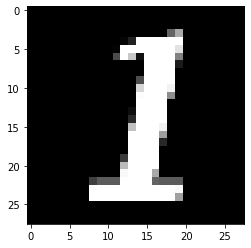

In [68]:
from random import randint


idx = randint(0, y_train.shape[0])
print(y_train[idx])

# [1 0 0 0 0 0 0 0 0 0] is hot-one representation of 0
# [0 1 0 0 0 0 0 0 0 0] is hot-one representation of 1
# [0 0 1 0 0 0 0 0 0 0] is hot-one representation of 2 etc.
plt.imshow(x_train[idx].reshape((28,28)),cmap='gray')

In [ ]:
########
#MODEL BELOW
#########

In [69]:
# GLOBAL VARIABLES
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x, verbose=0)

In [75]:
backend.clear_session()
model = Sequential()

model.add(Conv2D(32,kernel_size=3,activation='relu',input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(32,kernel_size=3,activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32,kernel_size=5,strides=2,padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(64,kernel_size=3,activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64,kernel_size=3,activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64,kernel_size=5,strides=2,padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [76]:
# CREATE VALIDATION SET
X_train2, X_val2, Y_train2, Y_val2 = x_train, x_test, y_train, y_test
# TRAIN NETWORK
epochs = 35
    
# CREATE MORE TRAINING IMAGES VIA DATA AUGMENTATION
datagen = ImageDataGenerator(
        rotation_range=10,  
        zoom_range = 0.1,  
        width_shift_range=0.1, 
        height_shift_range=0.1)
# TRAIN NETWORK
history = model.fit(datagen.flow(X_train2,Y_train2, batch_size=64), 
    epochs = epochs, steps_per_epoch = X_train2.shape[0]//64,
    validation_data = (X_val2,Y_val2), callbacks=[annealer], verbose=1)

print(f"Epochs={epochs}, Train accuracy={max(history.history['accuracy'])}, Validation accuracy={max(history.history['val_accuracy'])}")

Epoch 1/35
1064/1064 [==============================] - 103s 96ms/step - loss: 0.3680 - accuracy: 0.8866 - val_loss: 0.0629 - val_accuracy: 0.9790
Epoch 2/35
1064/1064 [==============================] - 105s 98ms/step - loss: 0.1071 - accuracy: 0.9679 - val_loss: 0.0320 - val_accuracy: 0.9895
Epoch 3/35
1064/1064 [==============================] - 105s 99ms/step - loss: 0.0822 - accuracy: 0.9755 - val_loss: 0.0255 - val_accuracy: 0.9920
Epoch 4/35
1064/1064 [==============================] - 115s 108ms/step - loss: 0.0700 - accuracy: 0.9788 - val_loss: 0.0305 - val_accuracy: 0.9904
Epoch 5/35
1064/1064 [==============================] - 106s 100ms/step - loss: 0.0645 - accuracy: 0.9808 - val_loss: 0.0223 - val_accuracy: 0.9916
Epoch 6/35
1064/1064 [==============================] - 107s 100ms/step - loss: 0.0537 - accuracy: 0.9844 - val_loss: 0.0497 - val_accuracy: 0.9849
Epoch 7/35
1064/1064 [==============================] - 108s 101ms/step - loss: 0.0491 - accuracy: 0.9857 - val_los

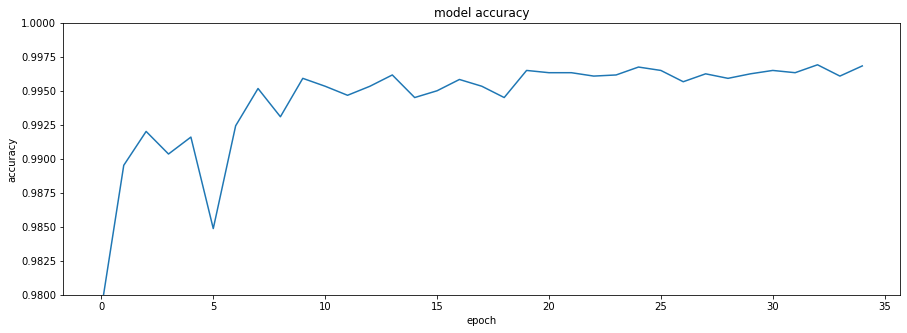

In [77]:
# PLOT ACCURACIES
plt.figure(figsize=(15,5))
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
axes = plt.gca()
axes.set_ylim([0.98,1])
plt.show()

In [23]:
model.save("../../model/model")

INFO:tensorflow:Assets written to: model/assets
